In [86]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# Carga de los dataframe

In [87]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

# Columnas

In [88]:
postulantes_educacion.columns

Index(['idpostulante', 'nombre', 'estado'], dtype='object')

In [89]:
postulantes_genero_y_edad.columns

Index(['idpostulante', 'fechanacimiento', 'sexo'], dtype='object')

In [90]:
vistas.columns

Index(['idAviso', 'timestamp', 'idpostulante'], dtype='object')

In [91]:
postulaciones.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion'], dtype='object')

In [92]:
avisos_online.columns

Index(['idaviso'], dtype='object')

In [93]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

# informacion de columnas

In [94]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [95]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [96]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [97]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [98]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [99]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


#  dataframe

In [100]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [101]:
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [102]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [103]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [104]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [105]:
avisos_detalle.head(30)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola


# tamanio de los dataframe

In [106]:

print("Postulantes Educacion: " + str(postulantes_educacion.shape))

print("Postulantes Genero y Edad: " + str(postulantes_genero_y_edad.shape))

print("Vistas: " + str(vistas.shape))

print("Postulaciones: " + str(postulaciones.shape))

print("Avisos Online: " + str(avisos_online.shape))

print("Avisos Detalle: " + str(avisos_detalle.shape))

Postulantes Educacion: (298231, 3)
Postulantes Genero y Edad: (200888, 3)
Vistas: (961897, 3)
Postulaciones: (3401623, 3)
Avisos Online: (5028, 1)
Avisos Detalle: (13534, 11)


# Cantidad por valores de columna

In [107]:
postulantes_educacion['nombre'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = postulantes_genero_y_edad['fechanacimiento'].apply(lambda x: x.split('-')[0])


Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [108]:


postulantes_educacion['estado'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = po

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [109]:
#le sumo la xolumna edad por q viene la fecha de nacimiento y no la edad especifica
postulantes_genero_y_edad['edad'] =  2018 - postulantes_genero_y_edad[postulantes_genero_y_edad['fechanacimiento'].notnull()]['fechanacimiento'].apply(lambda x: x.split('-')[0]).apply(np.int64)
#aca no me dejaba convertir la col edad de float a int por los nan's asii q converti los nana a 0 y conveti toda la col en int
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0.0).apply(np.int64)
#saque los valores ridiculos
edades = postulantes_genero_y_edad[(postulantes_genero_y_edad['edad'] > 17) & (postulantes_genero_y_edad['edad'] < 100)]['edad'].value_counts().sort_index(ascending=False)


<IPython.core.display.Javascript object>


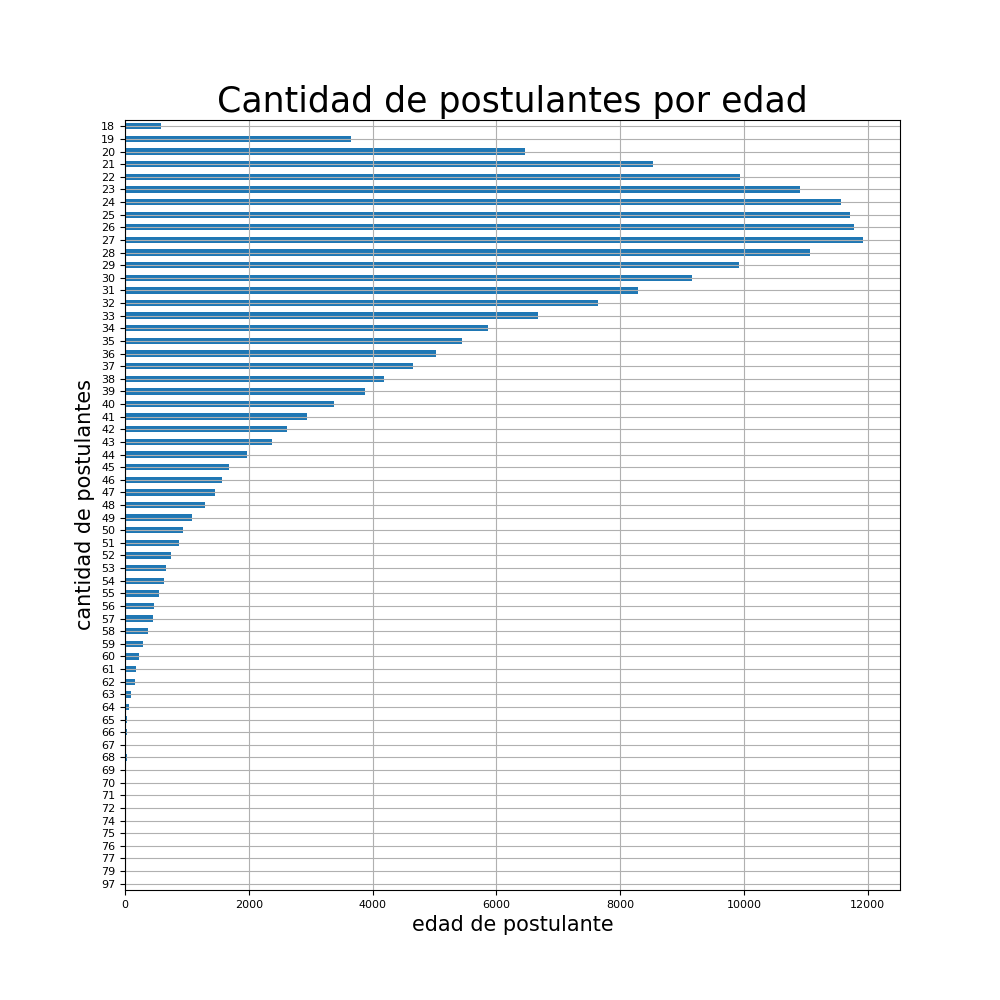

Text(0.5,1,'Cantidad de postulantes por edad')

In [110]:
%matplotlib notebook
edades.plot(kind='barh',figsize=(10,10),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('cantidad de postulantes',fontsize=15);
ax.set_xlabel('edad de postulante',fontsize=15)
ax.set_title('Cantidad de postulantes por edad',fontsize=25)

<IPython.core.display.Javascript object>


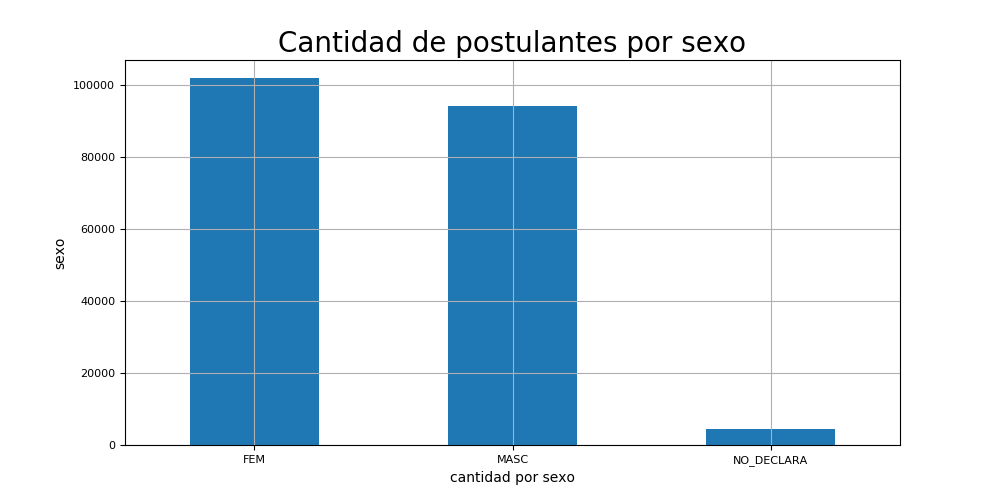

In [58]:
%matplotlib notebook

postulantes_genero_y_edad['sexo'].value_counts().plot(kind='bar',figsize=(10,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('sexo',fontsize=10);
ax.set_xlabel('cantidad por sexo',fontsize=10)
ax.set_title('Cantidad de postulantes por sexo',fontsize=20)


In [111]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 4 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
edad               200888 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [115]:

postulantes_genero_y_edad['het_map'] = 1
for_hetmap1 = postulantes_genero_y_edad[((postulantes_genero_y_edad['sexo']=='FEM') | (postulantes_genero_y_edad['sexo']=='MASC'))& (postulantes_genero_y_edad['edad']<100)]
for_hetmap1 = for_hetmap1.pivot_table(index='sexo', columns='edad', values='het_map', aggfunc='sum')
for_hetmap1

edad,0,12,18,19,20,21,22,23,24,25,...,69,70,71,72,74,75,76,77,79,97
sexo,,,,,,,,,,,,,,,,,,,,,
FEM,304.0,NaN,352.0,2210.0,3741.0,4937.0,5775.0,6330.0,6520.0,6704.0,...,1.0,5.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
MASC,323.0,1.0,229.0,1431.0,2708.0,3556.0,4153.0,4551.0,5021.0,4994.0,...,10.0,4.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,NaN


<IPython.core.display.Javascript object>


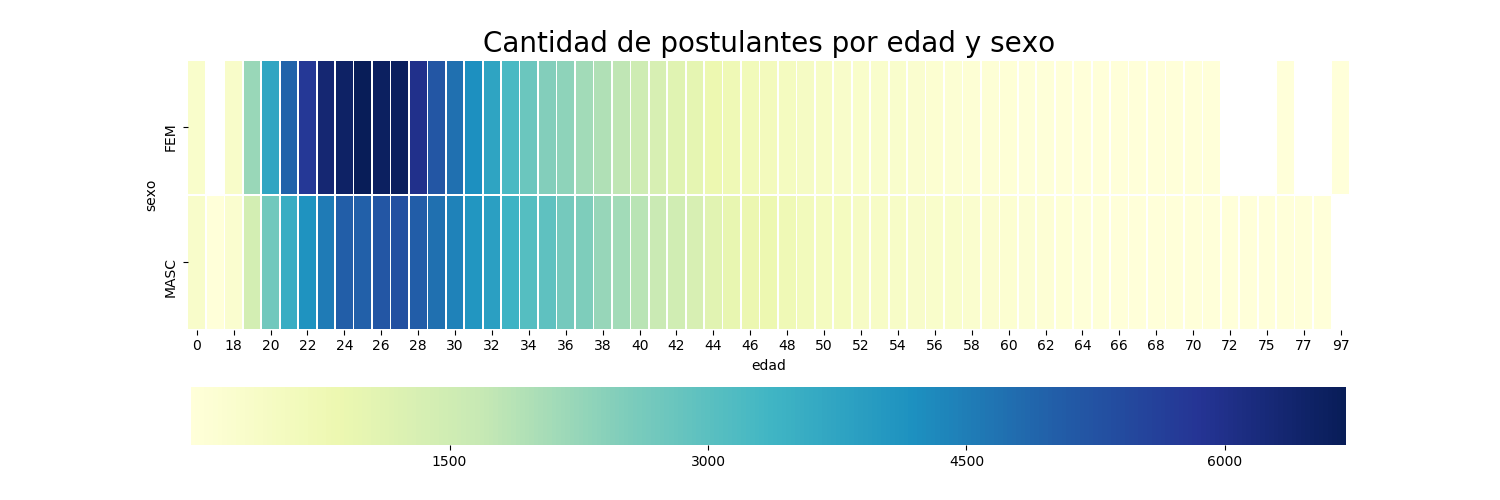

Text(0.5,1,'Cantidad de postulantes por edad y sexo')

In [116]:
%matplotlib notebook
g = sns.heatmap(for_hetmap1, linewidths=.5, cmap="YlGnBu",  xticklabels = 2,cbar_kws={"orientation": "horizontal"} )
ax=plt.gca()
ax.set_title('Cantidad de postulantes por edad y sexo',fontsize=20)

In [117]:
postulantes_educacion['het_map'] = 1
for_hetmap2 = postulantes_educacion.pivot_table(index='estado', columns='nombre', values='het_map', aggfunc='sum')
for_hetmap2

nombre,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
estado,,,,,,,
Abandonado,15,144,947,317,3156,5692,14955
En Curso,94,1519,4919,2239,3995,15032,50733
Graduado,105,1935,18882,4831,103105,27009,38607


<IPython.core.display.Javascript object>


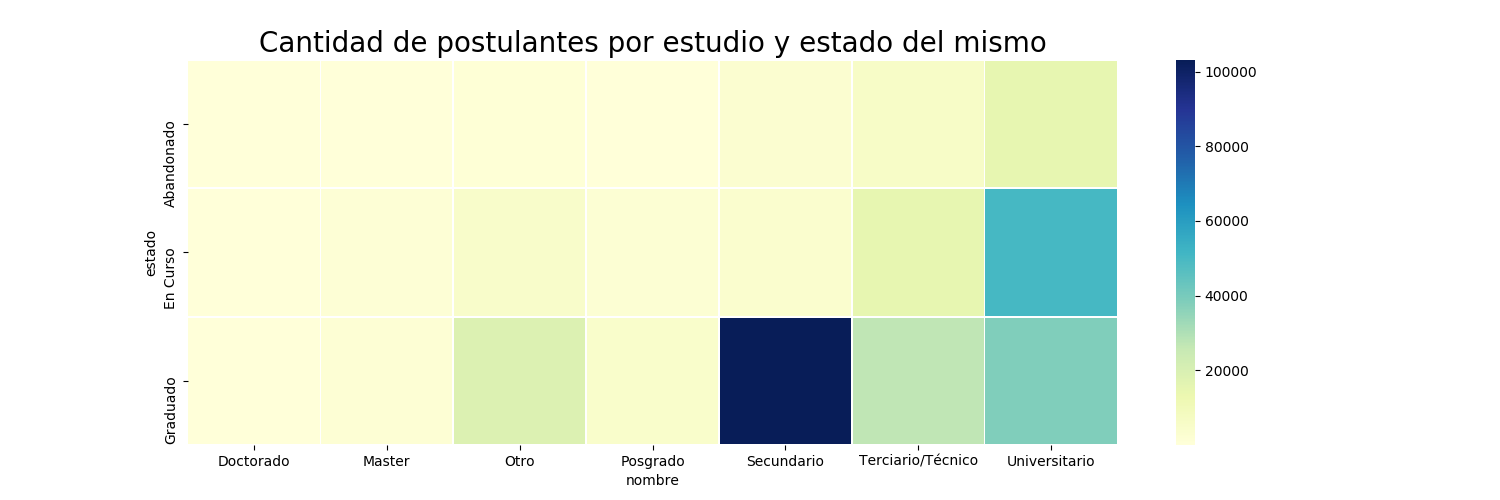

Text(0.5,1,'Cantidad de postulantes por estudio y estado del mismo')

In [118]:
%matplotlib notebook
g = sns.heatmap(for_hetmap2, linewidths=.5, cmap="YlGnBu")
ax=plt.gca()
ax.set_title('Cantidad de postulantes por estudio y estado del mismo',fontsize=20)

In [74]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

<IPython.core.display.Javascript object>


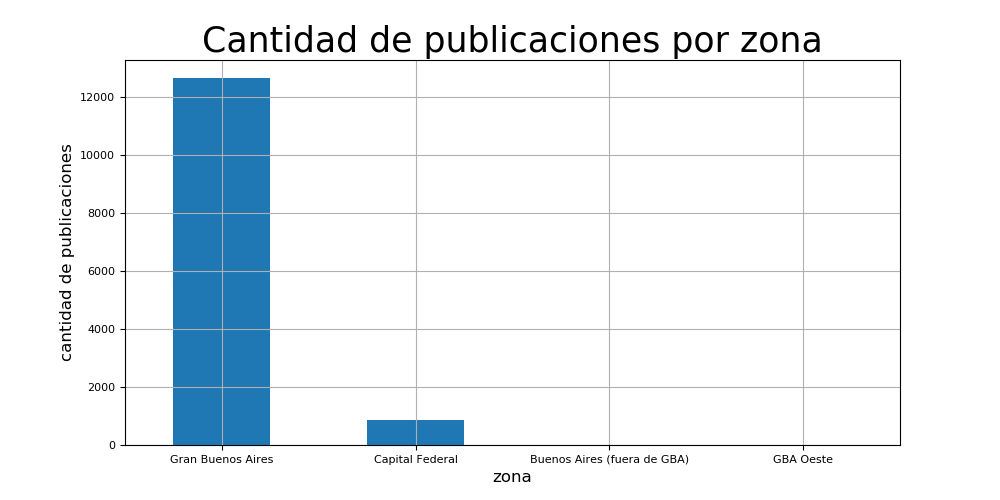

Text(0.5,1,'Cantidad de publicaciones por zona')

In [119]:
%matplotlib notebook
avisos_detalle['nombre_zona'].value_counts().plot(kind='bar',figsize=(10,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('cantidad de publicaciones',fontsize=12);
ax.set_xlabel('zona',fontsize=12)
ax.set_title('Cantidad de publicaciones por zona',fontsize=25)

In [66]:
avisos_detalle['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Vicente Lopez                1
Mendoza                      1
Santa Rosa                   1
La Plata                     1
Tortuguitas                  1
Parque Patricios             1
Barracas                     1
Microcentro                  1
paternal                     1
República Argentina          1
Buenos Aires Province        1
caba                         1
Zárate, Campana, Escobar     1
Name: ciudad, dtype: int64

<IPython.core.display.Javascript object>


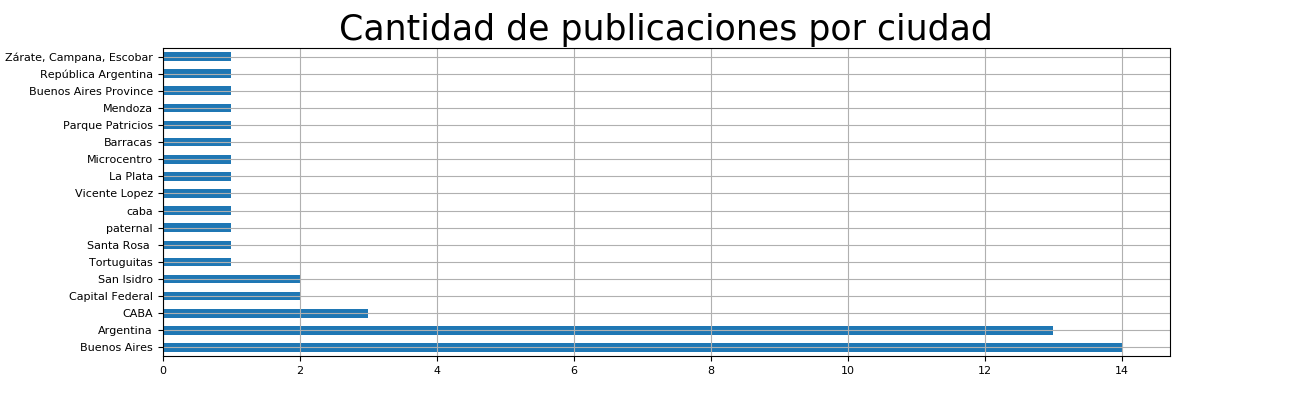

Text(0.5,1,'Cantidad de publicaciones por ciudad')

In [120]:
%matplotlib notebook
avisos_detalle['ciudad'].value_counts().plot(kind='barh',figsize=(13,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por ciudad',fontsize=25)

In [68]:
avisos_detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

<IPython.core.display.Javascript object>


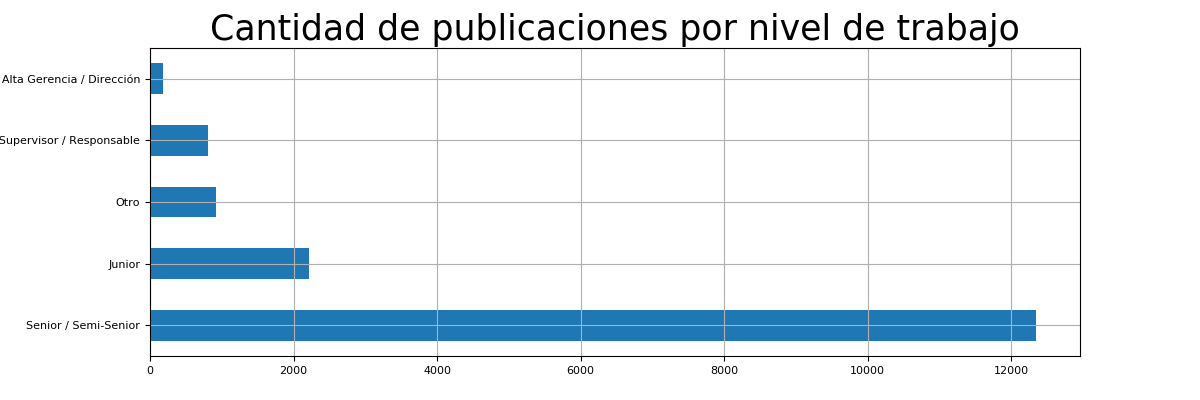

Text(0.5,1,'Cantidad de publicaciones por tipo de trabajo')

In [121]:
%matplotlib notebook
avisos_detalle['tipo_de_trabajo'].value_counts().plot(kind='barh',figsize=(10,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por tipo de trabajo',fontsize=25)

In [70]:
avisos_detalle['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [122]:
avisos_detalle['nivel_laboral'].value_counts().plot(kind='barh',figsize=(12,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_title('Cantidad de publicaciones por nivel de trabajo',fontsize=25)

Text(0.5,1,'Cantidad de publicaciones por nivel de trabajo')

In [123]:
avisos_detalle['nombre_area'].value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Otros                                     153
Marketing                                 153
Administración de Personal                152
Recepcionista                             151
Transporte                        

<IPython.core.display.Javascript object>


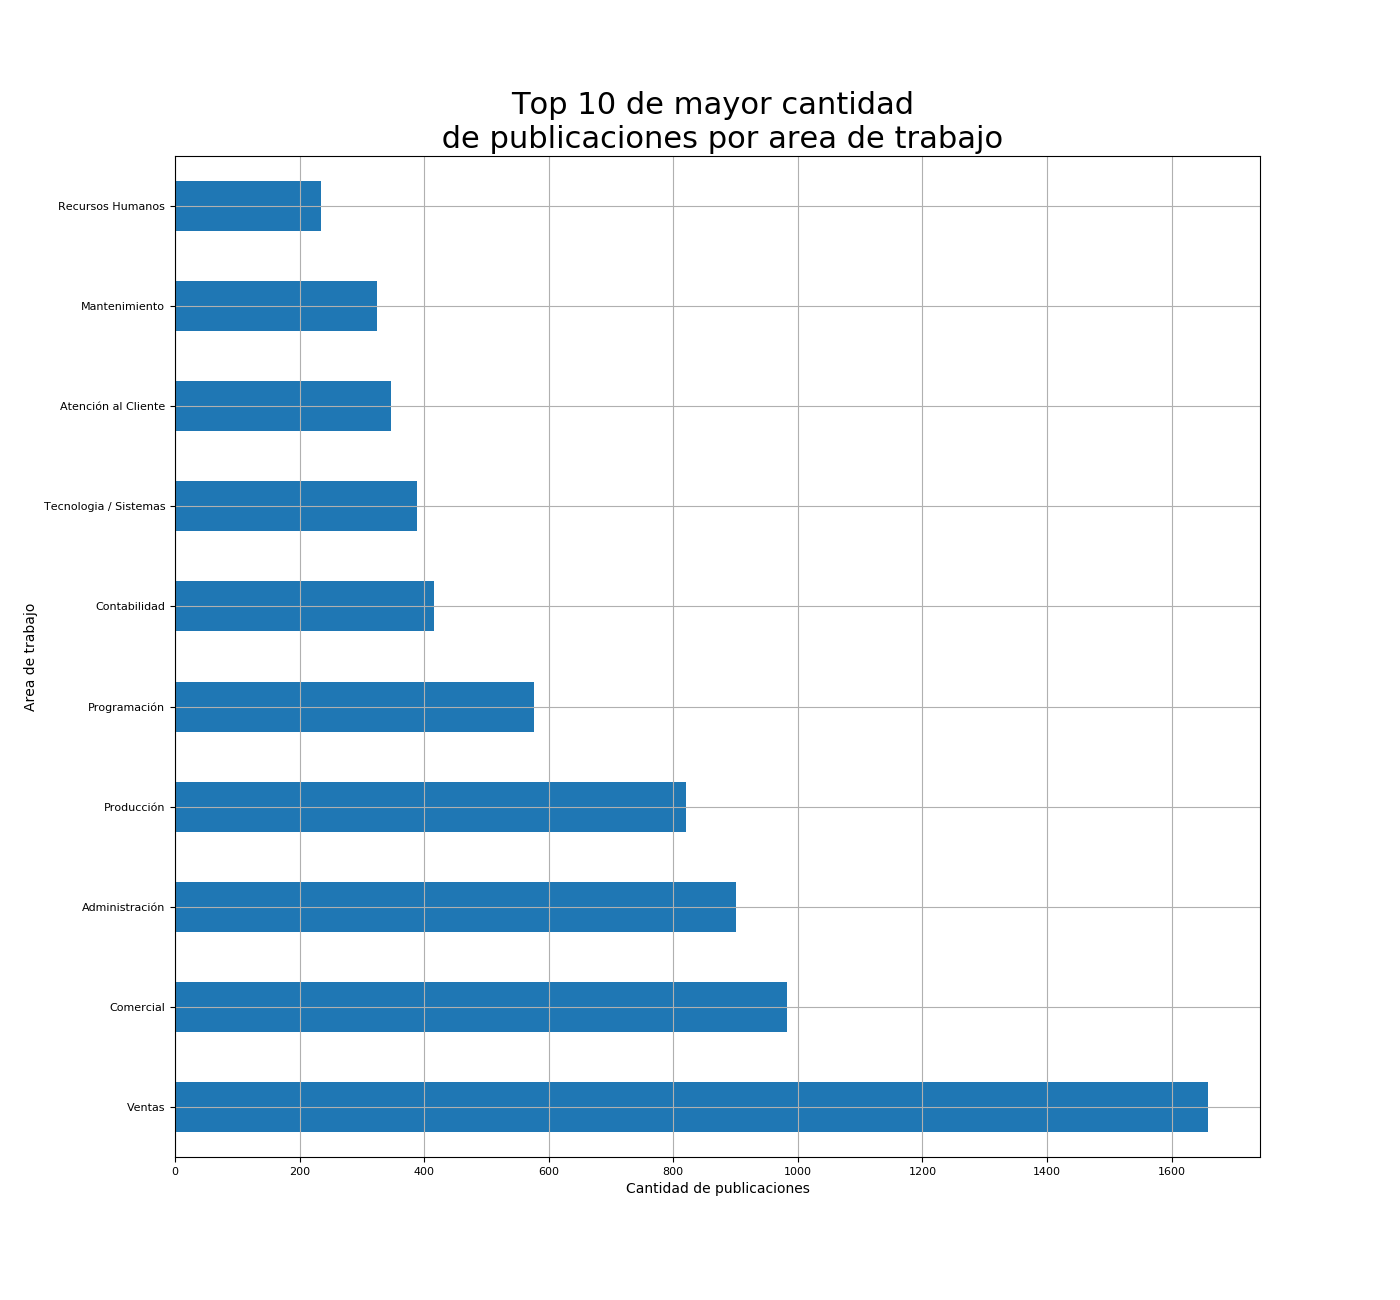

Text(0.5,1,'Top 10 de mayor cantidad \n de publicaciones por area de trabajo')

In [124]:
%matplotlib notebook
#saco los valores menores a 20 por que afectan en la visu
porAreas = avisos_detalle.groupby('nombre_area')['idaviso'].describe()
#porAreas = porAreas[porAreas['count']>20]
porAreas.sort_values(ascending = False, by = 'count').head(10)['count'].plot(kind='barh',figsize=(14,13),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel("Area de trabajo",fontsize= 10)
ax.set_xlabel("Cantidad de publicaciones",fontsize = 10)
ax.set_title('Top 10 de mayor cantidad \n de publicaciones por area de trabajo',fontsize=22)

<IPython.core.display.Javascript object>


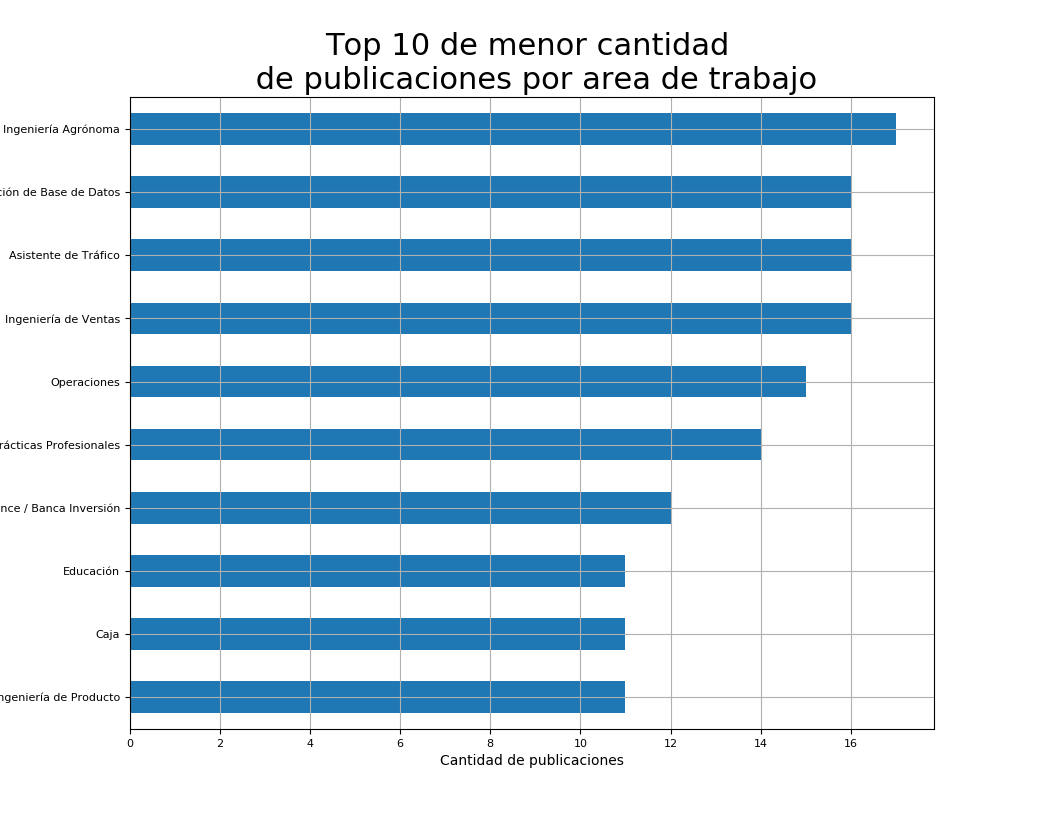

Text(0.5,1,'Top 10 de menor cantidad \n de publicaciones por area de trabajo')

In [114]:
%matplotlib notebook
#saco los valores menores a 20 por que afectan en la visu
porAreas = avisos_detalle.groupby('nombre_area')['idaviso'].describe()
porAreas = porAreas[porAreas['count']>10]
porAreas.sort_values(ascending = True, by = 'count').head(10)['count'].plot(kind='barh',figsize=(14,13),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel("Area de trabajo",fontsize= 10)
ax.set_xlabel("Cantidad de publicaciones",fontsize = 10)
ax.set_title('Top 10 de menor cantidad \n de publicaciones por area de trabajo',fontsize=22)

In [125]:
postulaciones

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03
5,1112277633,5awk,2018-01-29 13:34:44
6,1112302347,5awk,2018-02-07 20:49:22
7,1112291495,5awk,2018-02-07 20:50:13
8,1112304011,5awk,2018-02-07 20:51:15
9,1112326289,5awk,2018-02-09 20:24:57


In [126]:
import calendar
postulaciones.dropna(subset=['fechapostulacion'],inplace=True)
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones['Month'] = postulaciones['fechapostulacion'].map(lambda x:x.month)

In [127]:
postulaciones['Month'].value_counts()
postulaciones.sort_values().head()
postulaciones['Year']= postulaciones['fechapostulacion'].map(lambda x:x.year)
postulaciones['Year'].value_counts()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
%matplotlib notebook
postulaciones['Month'].value_counts().plot(kind='barh',figsize=(10,4),rot=0,fontsize= 8,grid = True);
label = ["Febrero","Enero"]
ax=plt.gca()
ax.set_yticklabels(label)
ax.set_xlabel("cantidad",fontsize=15)
ax.set_ylabel("mes",fontsize=15)
ax.set_title('Cantidad de postulaciones segun el mes del anio',fontsize=25)

In [128]:
def func(x):
    if x <= 500:
        return 1
    elif x >500 and x <= 1000:
        return 2
    elif x >1500 and x <= 2500:
        return 3
    elif x >2500 and x <= 5000:
        return 4
    elif x > 5000:
        return 5

avisos_detalle['descripcion_lenght'] = avisos_detalle['descripcion'].str.len()
avisos_detalle["lenght_category"] = avisos_detalle["descripcion_lenght"].apply(lambda x: func(x))




In [129]:
avisos_detalle.set_index('idaviso')

,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_lenght,lenght_category
idaviso,,,,,,,,,,,,
8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,1265,NaN
17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,380,1.0
1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,900,2.0
1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,591,2.0
1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,1896,3.0
1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A,707,2.0
1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A,847,2.0
1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A,771,2.0
9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga,1324,NaN


In [130]:
postulacionesyavisosdetalle = postulaciones.join(avisos_detalle.set_index('idaviso'),on='idaviso')
postulacionesyavisosdetalle.head()

,idaviso,idpostulante,fechapostulacion,Month,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_lenght,lenght_category
0,1112257047,NM5M,2018-01-15 16:22:34,1,1.0,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,2419.0,3.0
1,1111920714,NM5M,2018-02-06 09:04:50,2,1.0,Telemarketers part-time para venta de tarjetas...,<p>En Randstad Argentina nos encontramos en bú...,Gran Buenos Aires,NaN,NaN,Part-time,Senior / Semi-Senior,Telemarketing,RANDSTAD,1216.0,NaN
2,1112346945,NM5M,2018-02-22 09:04:47,2,1.0,Agente de Telemarketing,"<p style="""">4 Finance, importante empresa fina...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Telemarketing,Prestamo Movil,970.0,2.0
3,1112345547,NM5M,2018-02-22 09:04:59,2,1.0,Telemárketers part time,<p>En Randstad Argentina nos encontramos en bú...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Telemarketing,RANDSTAD,751.0,2.0
4,1112237522,5awk,2018-01-25 18:55:03,1,1.0,Jefe Contable Zona Barracas,<p>Para Empresa Pyme ubicada en zona de Barrac...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,SPEEDWORK RRHH - #1 en Selección de RRHH,780.0,2.0


In [131]:
postulacionesyavisosdetalle["lenght_category"].value_counts()

2.0    1116998
3.0     465580
1.0     402298
4.0     282584
5.0      14876
Name: lenght_category, dtype: int64

In [132]:
a = avisos_detalle["lenght_category"].value_counts()
a = a.to_frame()
a

,lenght_category
2.0,4396
3.0,2537
1.0,1743
4.0,1443
5.0,98


In [133]:
b = postulacionesyavisosdetalle["lenght_category"].value_counts()
b = b.to_frame()
b

,lenght_category
2.0,1116998
3.0,465580
1.0,402298
4.0,282584
5.0,14876


In [134]:
c = pd.merge(a,b, left_index=True, right_index=True)
c['cant_postulaciones'] = c['lenght_category_y']/c['lenght_category_x']
c.head()

,lenght_category_x,lenght_category_y,cant_postulaciones
2.0,4396,1116998,254.094177
3.0,2537,465580,183.515964
1.0,1743,402298,230.807803
4.0,1443,282584,195.830908
5.0,98,14876,151.795918


<IPython.core.display.Javascript object>


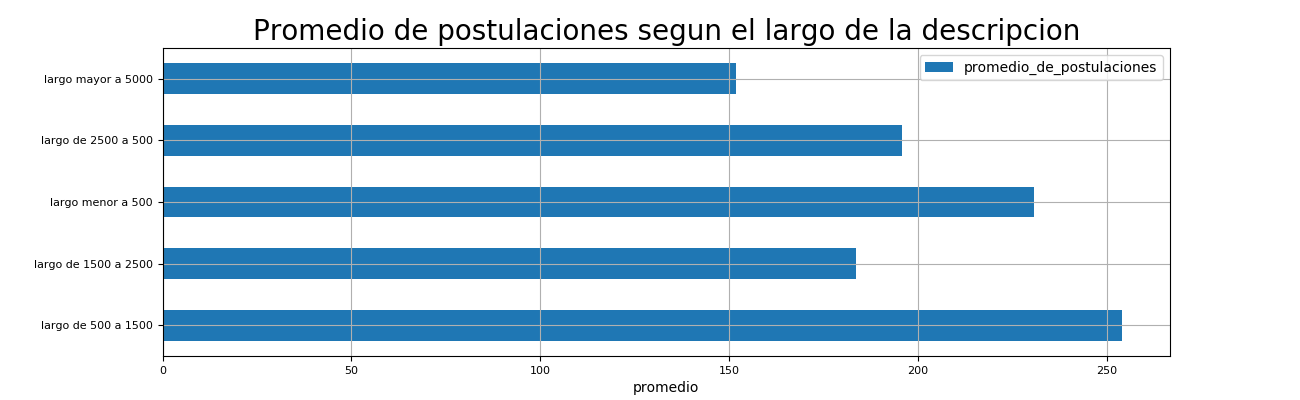

Text(0.5,1,'Promedio de postulaciones segun el largo de la descripcion')

In [135]:
%matplotlib notebook
c['promedio_de_postulaciones'] = c['cant_postulaciones']
c.plot(kind='barh',figsize=(13,4),rot=0,fontsize= 8,grid = True,y='promedio_de_postulaciones');
ax=plt.gca()
y_labels=["largo de 500 a 1500","largo de 1500 a 2500","largo menor a 500","largo de 2500 a 500","largo mayor a 5000"]
ax.set_yticklabels(y_labels)
ax.set_xlabel("promedio", fontsize =10)
ax.set_title('Promedio de postulaciones segun el largo de la descripcion',fontsize=20)

In [53]:
postulaciones.shape

(3401623, 4)

In [136]:
postulantes_educacion.shape

(298231, 4)

In [137]:
#Solo tengo en cuenta los postulantes que solo tienen un nivel de estuduio

postulantes_1_estudio = postulantes_educacion.drop_duplicates(subset='idpostulante',keep=False)
postulantes_1_estudio.shape


(108476, 4)

In [138]:
x = pd.merge(postulaciones,postulantes_1_estudio,how ='inner',on = 'idpostulante' )
x.shape

(1706904, 7)

<IPython.core.display.Javascript object>


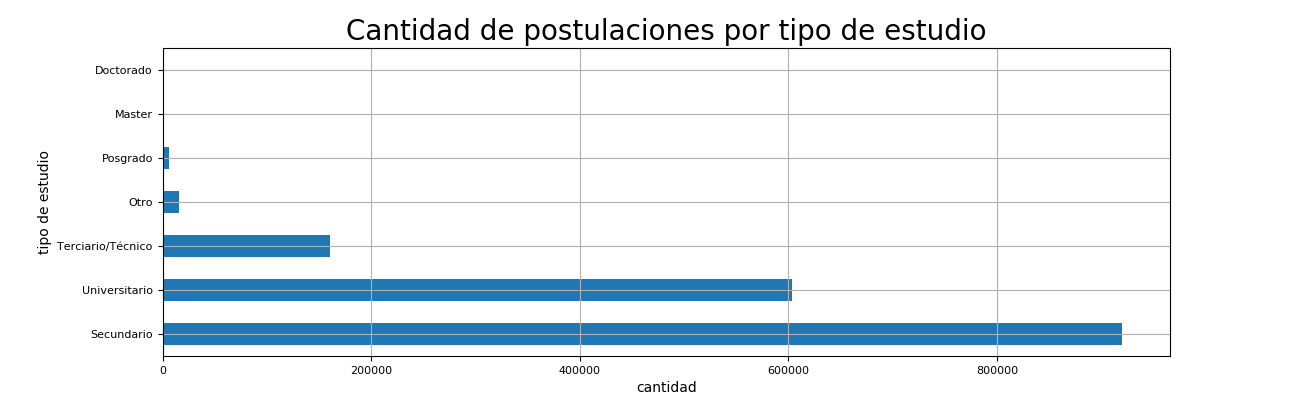

Text(0.5,1,'Cantidad de postulaciones por tipo de estudio')

In [139]:
%matplotlib notebook
x['nombre'].value_counts().plot(kind='barh',figsize=(13,4),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_xlabel("cantidad", fontsize =10)
ax.set_ylabel("tipo de estudio", fontsize =10)
ax.set_title('Cantidad de postulaciones por tipo de estudio',fontsize=20)


<IPython.core.display.Javascript object>


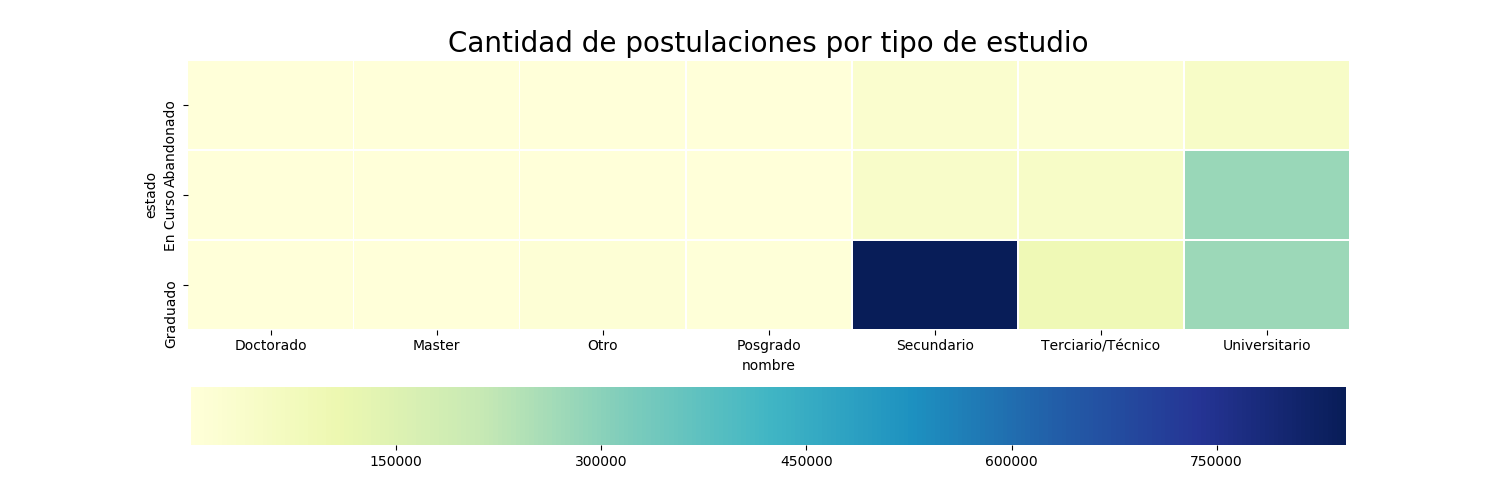

Text(0.5,1,'Cantidad de postulaciones por tipo de estudio')

In [140]:
%matplotlib notebook
x['het_map'] = 1
for_hetmap3 = x.pivot_table(index='estado', columns='nombre', values='het_map', aggfunc='sum')

g = sns.heatmap(for_hetmap3, linewidths=.5, cmap="YlGnBu",cbar_kws={"orientation": "horizontal"} )
ax=plt.gca()
ax.set_title('Cantidad de postulaciones por tipo de estudio',fontsize=20)
#ax.set_yticklabels([1,2,3] )

In [ ]:
publicaciones

In [141]:
people_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'people_name': ['People A', 'People B', 'People C', 'People D', 'People E'],
}

q = pd.DataFrame(people_data, columns = ['subject_id', 'people_name'])
q

,subject_id,people_name
0,1,People A
1,2,People B
2,3,People C
3,4,People D
4,5,People E


In [142]:
subject_data = {
        'subject_id': ['1', '2','2','200'],
        'subject_name': ['Subject 1', 'Subject 2','Subject 2b', 'Subject 200'],
}
w = pd.DataFrame(subject_data, columns = ['subject_id', 'subject_name'])
w

,subject_id,subject_name
0,1,Subject 1
1,2,Subject 2
2,2,Subject 2b
3,200,Subject 200


In [143]:
pd.merge(q,w,how = 'inner', on = 'subject_id')

,subject_id,people_name,subject_name
0,1,People A,Subject 1
1,2,People B,Subject 2
2,2,People B,Subject 2b


In [144]:
pd.merge(q,w,how = 'outer', on = 'subject_id')

,subject_id,people_name,subject_name
0,1,People A,Subject 1
1,2,People B,Subject 2
2,2,People B,Subject 2b
3,3,People C,NaN
4,4,People D,NaN
5,5,People E,NaN
6,200,NaN,Subject 200


In [145]:
pd.merge(q,w,how = 'left', on = 'subject_id')

,subject_id,people_name,subject_name
0,1,People A,Subject 1
1,2,People B,Subject 2
2,2,People B,Subject 2b
3,3,People C,NaN
4,4,People D,NaN
5,5,People E,NaN


In [146]:
pd.merge(q,w,how = 'right', on = 'subject_id')

,subject_id,people_name,subject_name
0,1,People A,Subject 1
1,2,People B,Subject 2
2,2,People B,Subject 2b
3,200,NaN,Subject 200


In [147]:
empresas = avisos_detalle['denominacion_empresa'].value_counts().sort_values(ascending = False).head(10)
empresas


RANDSTAD                              562
Manpower                              422
Grupo Gestión                         383
Assistem                              289
SOLUTIX S.A.                          260
BAYTON                                238
Pullmen Servicios Empresarios S.A.    229
Adecco - Región NORTE & OESTE GBA     205
Suministra                            203
Adecco -Región Office                 200
Name: denominacion_empresa, dtype: int64

<IPython.core.display.Javascript object>


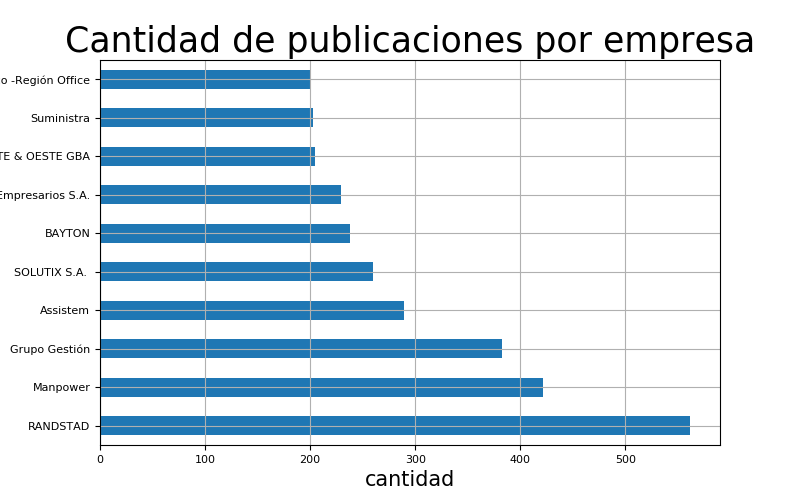

Text(0.5,1,'Cantidad de publicaciones por empresa')

In [148]:
%matplotlib notebook
empresas.plot(kind='barh',figsize=(8,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('Empresa',fontsize=15);
ax.set_xlabel('cantidad',fontsize=15)
ax.set_title('Cantidad de publicaciones por empresa',fontsize=25)

# #Se toma las postulaciones de personas que estan estudiando

In [149]:
postulaciones_detalle = pd.merge(postulaciones, postulantes_educacion, on='idpostulante', how='left')

enCurso = (postulaciones_detalle['estado']=='En Curso')

postulaciones_estudiantes = postulaciones_detalle[enCurso]

postulaciones_estudiantes.head()

,idaviso,idpostulante,fechapostulacion,Month,nombre,estado,het_map
82,1112261212,NdJl,2018-01-16 08:50:30,1,Posgrado,En Curso,1.0
84,1112273308,NdJl,2018-01-23 07:53:47,1,Posgrado,En Curso,1.0
86,1112281548,NdJl,2018-01-24 05:10:12,1,Posgrado,En Curso,1.0
88,1112260409,NdJl,2018-01-24 05:17:29,1,Posgrado,En Curso,1.0
90,1112293547,NdJl,2018-01-29 15:41:43,1,Posgrado,En Curso,1.0


<IPython.core.display.Javascript object>


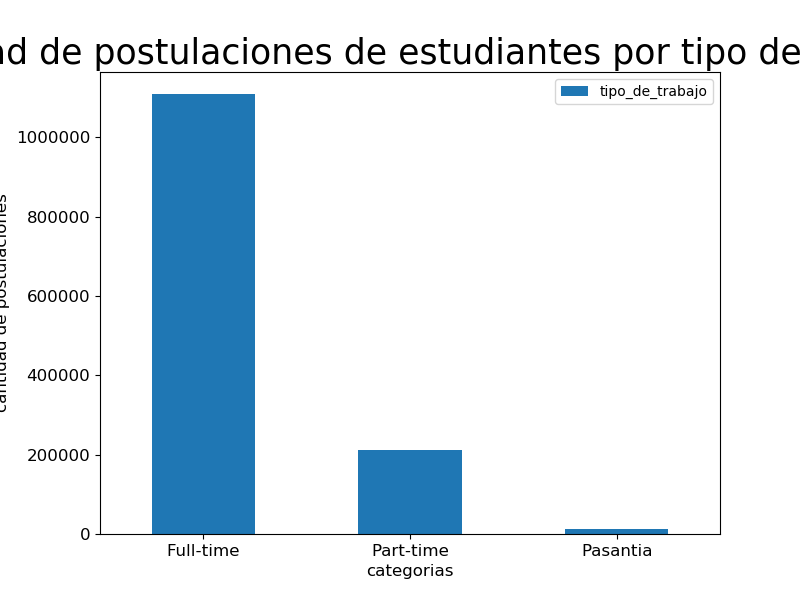

Text(0.5,1,'Cantidad de postulaciones de estudiantes por tipo de trabajo ')

In [150]:
%matplotlib notebook
total = pd.merge(postulaciones_estudiantes, avisos_detalle, on='idaviso', how='left')

total = total[~pd.isnull(total['tipo_de_trabajo'])]
total

grupo = total.groupby('tipo_de_trabajo').agg({'tipo_de_trabajo':'count'}).sort_values('tipo_de_trabajo', ascending = False).head(3)
grupo.plot(kind='bar', figsize=(8,6),rot=0, fontsize= 12,grid = False)
ax=plt.gca()
ax.set_ylabel('cantidad de postulaciones',fontsize=12);
ax.set_xlabel('categorias',fontsize=12)
ax.set_title('Cantidad de postulaciones de estudiantes por tipo de trabajo ',fontsize=25)

# Areas con mayor cantidad de postulaciones por genero

In [151]:
#Mergeo postulaciones con postulantes
postulaciones_postulantes = postulantes_genero_y_edad.merge(postulaciones,on=['idpostulante','idpostulante'])
#Mergeo lo anterior con el detalle de las postulaciones
postulaciones_detalle_postulantes = postulaciones_postulantes.merge(avisos_detalle, on=['idaviso','idaviso'])

#Obtengo los registros por genero
postulaciones_hombres = postulaciones_detalle_postulantes[postulaciones_detalle_postulantes['sexo'] == 'MASC']
postulaciones_mujeres = postulaciones_detalle_postulantes[postulaciones_detalle_postulantes['sexo'] == 'FEM']

In [152]:
postulaciones_detalle_postulantes['nombre_area'].value_counts().head()

Ventas                 408148
Administración         291135
Producción             277089
Comercial              216677
Atención al Cliente    195636
Name: nombre_area, dtype: int64

In [153]:
postulaciones_por_categoria_y_genero = postulaciones_detalle_postulantes[['nombre_area', 'sexo']]
postulaciones_por_categoria_y_genero['hombre'] =  postulaciones_por_categoria_y_genero['sexo'] == 'MASC'
postulaciones_por_categoria_y_genero['mujer'] =  postulaciones_por_categoria_y_genero['sexo'] == 'FEM'

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
postulaciones_por_categoria_y_genero = postulaciones_por_categoria_y_genero.groupby('nombre_area').agg({'hombre': np.sum, 'mujer': np.sum})
postulaciones_por_categoria_y_genero['total'] = postulaciones_por_categoria_y_genero['hombre'] + postulaciones_por_categoria_y_genero['mujer']

<IPython.core.display.Javascript object>


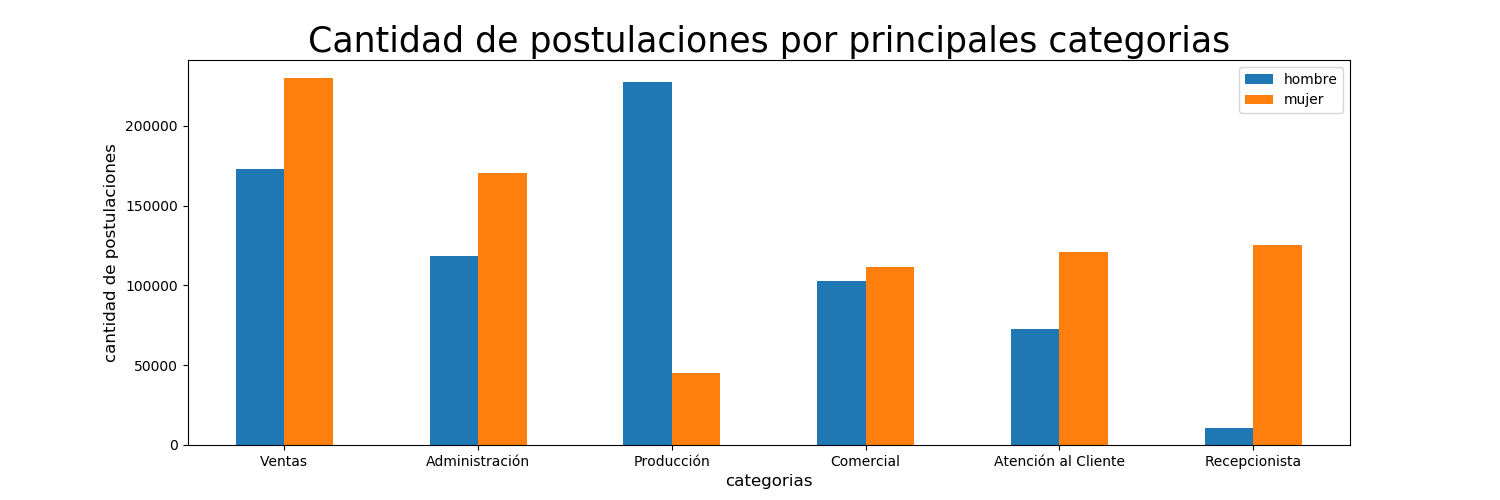

Text(0.5,1,'Cantidad de postulaciones por principales categorias')

In [155]:
postulaciones_por_categoria_y_genero.sort_values('total', ascending = False).head(6).plot(y=['hombre', 'mujer'], kind='bar', rot=0)
ax=plt.gca()
ax.set_ylabel('cantidad de postulaciones',fontsize=12);
ax.set_xlabel('categorias',fontsize=12)
ax.set_title('Cantidad de postulaciones por principales categorias',fontsize=25)